In [2]:
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
import datetime
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
pd.set_option('display.max_columns', None)
import lightgbm as lgb
from sklearn.metrics import log_loss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import time

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import time
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from sklearn.metrics import log_loss
import seaborn
from sklearn import linear_model
def r2(a, b):
    return np.corrcoef(a, b)*np.corrcoef(a, b)
import shap

In [3]:
df=pd.read_csv('../DATA.csv')
df=df.dropna(axis=0)

In [ ]:
city_X=city_data.loc[:, ['Rowid', 'up_down', 'curvature', 'inclination', 'tilt_direction', 'altitude', 'disto_river', 'disto_stations', 
             'disto_mainroad', 'disto_syorizyo', 'supply_hours', 'no_water_days', 'total_population ', 'population_served',
             'popu-served', 'number_taps', 'pipelength', 'pipelength_per_pipe', 'served/pipes', '(popu-served)/pipes', 
             'oldest_pipe_age', 'ST', 'RSF', 'FL', 'PF', 'RF', 'ratio', 'source_ecoli', 'pop_density']]

city_X=city_data.loc[:, ['Rowid', 'up_down', 'curvature', 'inclination', 'tilt_direction', 'altitude', 'disto_river', 'disto_stations', 
             'disto_mainroad', 'disto_syorizyo', 'pop_density']]

X_train_std['ST']=X_train_std['ST'].apply(lambda x:0 if x<0 else 1)
X_train_std['RSF']=X_train_std['RSF'].apply(lambda x:0 if x<0 else 1)
X_train_std['FL']=X_train_std['FL'].apply(lambda x:0 if x<0 else 1)
X_train_std['PF']=X_train_std['PF'].apply(lambda x:0 if x<0 else 1)
X_train_std['RF']=X_train_std['RF'].apply(lambda x:0 if x<0 else 1)
X_test_std['ST']=X_test_std['ST'].apply(lambda x:0 if x<0 else 1)
X_test_std['RSF']=X_test_std['RSF'].apply(lambda x:0 if x<0 else 1)
X_test_std['FL']=X_test_std['FL'].apply(lambda x:0 if x<0 else 1)
X_test_std['PF']=X_test_std['PF'].apply(lambda x:0 if x<0 else 1)
X_test_std['RF']=X_test_std['RF'].apply(lambda x:0 if x<0 else 1)

In [4]:
# 全データ
train_list=[]
test_list=[]
for i in df['NAME'].unique():
    city=df[df['NAME']==i]
    
    #分裂のためにdammy作成
    dammy_1=pd.DataFrame([np.ones(len(city.columns))], columns=city.columns)
    dammy_1['Rowid']='dammy'
    dammy_0=pd.DataFrame([np.zeros(len(city.columns))], columns=city.columns)
    dammy_0['Rowid']='dammy'
    dammy=pd.concat([dammy_1, dammy_0, dammy_1, dammy_0])
    
    #dammyと結合
    city_data=pd.concat([city, dammy])
    
    # 分裂
    city_y=city_data['EColi.']
    city_X=city_data.loc[:, ['Rowid', 'disto_syorizyo', 'pop_density', 'altitude']]

    X_train, X_test, y_train, y_test=train_test_split(city_X, city_y, test_size=0.3, random_state=1, stratify=city_y)
    
    # dammy削除
    train=pd.concat([X_train, y_train], axis=1)
    train=train[train['Rowid']!='dammy']
    
    test=pd.concat([X_test, y_test], axis=1)
    test=test[test['Rowid']!='dammy']
    
    train_list.append(train)
    test_list.append(test)

# train, testをそれぞれ分ける
train=pd.concat(train_list)
test=pd.concat(test_list)
train=train.drop('Rowid', axis=1)
X_train=train.drop('EColi.', axis=1)
y_train=train['EColi.']
test=test.drop('Rowid', axis=1)
X_test=test.drop('EColi.', axis=1)
y_test=test['EColi.']

print('Lables counts in y_train:', np.bincount(y_train))
print('Lables counts in y_test:', np.bincount(y_test))

X_train_std=(X_train-X_train.mean(axis=0))/X_train.std(axis=0)
X_test_std=(X_test-X_train.mean(axis=0))/X_train.std(axis=0)

Lables counts in y_train: [72 78]
Lables counts in y_test: [26 38]


# LDA

0.5733333333333334
0.546875


Text(0, 0.5, 'true label')

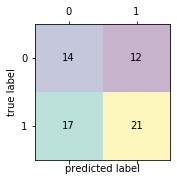

In [5]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_std, y_train)
print(clf.score(X_train_std, y_train))
print(clf.score(X_test_std, y_test))

from sklearn.metrics import confusion_matrix
y_pred=clf.predict(X_test_std)
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')

# SVC

0.5733333333333334
0.53125


Text(0, 0.5, 'true label')

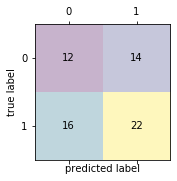

In [61]:
from sklearn.svm import SVC
svm=SVC(kernel='linear', C=100, random_state=1, probability=True)
svm.fit(X_train_std, y_train)
print(svm.score(X_train_std, y_train))
print(svm.score(X_test_std, y_test))

from sklearn.metrics import confusion_matrix
y_pred=svm.predict(X_test_std)
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')

# ロジスティック回帰

0.58
0.546875


Text(0, 0.5, 'true label')

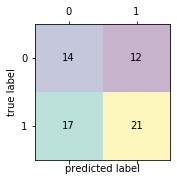

In [62]:
lr=LogisticRegression(C=100, random_state=1)
lr.fit(X_train_std, y_train)
print(lr.score(X_train_std, y_train))
print(lr.score(X_test_std, y_test))

from sklearn.metrics import confusion_matrix
y_pred=lr.predict(X_test_std)
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')

# random forest

0.7266666666666667
0.65625


Text(0, 0.5, 'true label')

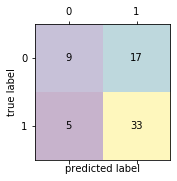

In [6]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth=3, criterion='entropy', n_estimators=29, random_state=1)
forest.fit(X_train_std, y_train)
print(forest.score(X_train_std, y_train))
print(forest.score(X_test_std, y_test))

from sklearn.metrics import confusion_matrix
y_pred=forest.predict(X_test_std)
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')

# top2 shap

In [8]:
def get_shap_value(X_df, model):
    explainer = shap.TreeExplainer(model=model, feature_perturbation= 'tree_path_dependent', model_output= 'margin')
    shap_values = explainer.shap_values(X=X_df)
    sorted_val = np.array([])
    sorted_index = np.argsort(shap_values[1], axis=1)[:, ::-1]
    top2_index = sorted_index[:, :2]
    for i, idx in enumerate(top2_index):
        tmp_val = shap_values[1][i][idx]
        sorted_val = np.append(sorted_val, tmp_val)
    top2_val = sorted_val.reshape(top2_index.shape[0], top2_index.shape[1])
    return top2_index, top2_val

In [10]:
top2_index, top2_val = get_shap_value(X_test_std, forest)

In [14]:
# 予測値、実際の値、重要な変数
test_pred_fea=pd.DataFrame({'y_test':y_test.values, 'y_pred':y_pred})

test_pred_fea['most_impo_index']=top2_index[:, 0]
test_pred_fea['second_impo_index']=top2_index[:, 1]
test_pred_fea['most_impo_val']=top2_val[:, 0]
test_pred_fea['second_impo_val']=top2_val[:, 1]
exp=pd.DataFrame({'exp':X_test_std.columns})
exp=exp.reset_index()
test_pred_fea['most_impo_name']=test_pred_fea['most_impo_index'].map(lambda x: exp[exp['index']==x].values[0, 1])
test_pred_fea['second_impo_name']=test_pred_fea['second_impo_index'].map(lambda x: exp[exp['index']==x].values[0, 1])

# 可視化

In [16]:
# 正則化する前のデータ
# test data
train_list=[]
test_list=[]
for i in df['NAME'].unique():
    city=df[df['NAME']==i]
    
    #分裂のためにdammy作成
    dammy_1=pd.DataFrame([np.ones(len(city_data.columns))], columns=city_data.columns)
    dammy_1['Rowid']='dammy'
    dammy_0=pd.DataFrame([np.zeros(len(city_data.columns))], columns=city_data.columns)
    dammy_0['Rowid']='dammy'
    dammy=pd.concat([dammy_1, dammy_0, dammy_1, dammy_0])
    
    #dammyと結合
    city_data=pd.concat([city, dammy])
    
    # 分裂
    city_y=city_data['EColi.']
    city_X=city_data.loc[:, ['X', 'Y', 'Rowid', 'up_down', 'curvature', 'inclination', 'tilt_direction', 'altitude', 'disto_river', 'disto_stations', 
             'disto_mainroad', 'disto_syorizyo', 'supply_hours', 'no_water_days', 'total_population ', 'population_served',
             'popu-served', 'number_taps', 'pipelength', 'pipelength_per_pipe', 'served/pipes', '(popu-served)/pipes', 
             'oldest_pipe_age', 'ST', 'RSF', 'FL', 'PF', 'RF', 'ratio', 'source_ecoli']]
    X_train, X_test, y_train, y_test=train_test_split(city_X, city_y, test_size=0.3, random_state=1, stratify=city_y)
    
    # dammy削除
    train=pd.concat([X_train, y_train], axis=1)
    train=train[train['Rowid']!='dammy']
    
    test=pd.concat([X_test, y_test], axis=1)
    test=test[test['Rowid']!='dammy']
    
    train_list.append(train)
    test_list.append(test)

# train, testをそれぞれ分ける
train=pd.concat(train_list)
test=pd.concat(test_list)
train=train.drop('Rowid', axis=1)
test=test.drop('Rowid', axis=1)

test['y_pred']=y_pred
gis=test.copy()

gis.X=gis.X.apply(lambda x: float(x))
gis.Y=gis.Y.apply(lambda x: float(x))

geometry = [Point(xy) for xy in zip(gis.X, gis.Y)]
gis= gpd.GeoDataFrame(gis, geometry=geometry)

In [17]:
gpd.GeoDataFrame.to_file(gis, "test_pred_ecoliratio_distshorizyou.gpkg", driver="GPKG", encoding='utf-8')

In [130]:
# all data
df=df.drop(df.index[[1, 2]])
df.X=df.X.apply(lambda x: float(x))

geometry = [Point(xy) for xy in zip(df.X, df.Y)]
df= gpd.GeoDataFrame(df, geometry=geometry)

In [132]:
gpd.GeoDataFrame.to_file(df, "all.gpkg", driver="GPKG", encoding='utf-8')

# Boosted forest

0.6733333333333333
0.640625


Text(0, 0.5, 'true label')

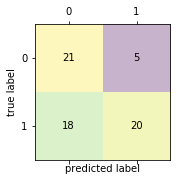

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=2, random_state=1)
ada=AdaBoostClassifier(base_estimator=tree, n_estimators=2, learning_rate=1.5, random_state=1)
ada.fit(X_train_std, y_train)
print(ada.score(X_train_std, y_train))
print(ada.score(X_test_std, y_test))

from sklearn.metrics import confusion_matrix
y_pred=ada.predict(X_test_std)
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')

# ROC AUC

In [120]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
mean_fpr=np.linspace(0, 1, 1000)
lda_mean_tpr=0.0
svm_mean_tpr=0.0
lr_mean_tpr=0.0
forest_mean_tpr=0.0
ada_mean_tpr=0.0

In [121]:
lda_probas=clf.predict_proba(X_test_std)
svm_probas=svm.predict_proba(X_test_std)
lr_probas=lr.predict_proba(X_test_std)
forest_probas=forest.predict_proba(X_test_std)
ada_probas=ada.predict_proba(X_test_std)

In [122]:
lda_fpr, lda_tpr, lda_thresholds=roc_curve(y_test, lda_probas[:, 1], pos_label=1)
svm_fpr, svm_tpr, svm_thresholds=roc_curve(y_test, svm_probas[:, 1], pos_label=1)
lr_fpr, lr_tpr, lr_thresholds=roc_curve(y_test, lr_probas[:, 1], pos_label=1)
forest_fpr, forest_tpr, forest_thresholds=roc_curve(y_test, forest_probas[:, 1], pos_label=1)
ada_fpr, ada_tpr, ada_thresholds=roc_curve(y_test, ada_probas[:, 1], pos_label=1)

In [123]:
lda_mean_tpr+=interp(mean_fpr, lda_fpr, lda_tpr)
svm_mean_tpr+=interp(mean_fpr, svm_fpr, svm_tpr)
lr_mean_tpr+=interp(mean_fpr, lr_fpr, lr_tpr)
forest_mean_tpr+=interp(mean_fpr, forest_fpr, forest_tpr)
ada_mean_tpr+=interp(mean_fpr, ada_fpr, ada_tpr)

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


In [124]:
lda_mean_tpr[0]=0.0
svm_mean_tpr[0]=0.0
lr_mean_tpr[0]=0.0
forest_mean_tpr[0]=0.0
ada_mean_tpr[0]=0.0

In [125]:
lda_roc_auc=auc(lda_fpr, lda_tpr)
svm_roc_auc=auc(svm_fpr, svm_tpr)
lr_roc_auc=auc(lr_fpr, lr_tpr)
forest_roc_auc=auc(forest_fpr, forest_tpr)
ada_roc_auc=auc(ada_fpr, ada_tpr)

In [126]:
print(lda_roc_auc)
print(svm_roc_auc)
print(lr_roc_auc)
print(forest_roc_auc)
print(ada_roc_auc)

0.5078895463510849
0.5167652859960552
0.509861932938856
0.514792899408284
0.4955621301775148


In [127]:
fig=plt.figure(figsize=(7, 5))

<Figure size 504x360 with 0 Axes>

Text(0, 0.5, 'True Positive Rate')

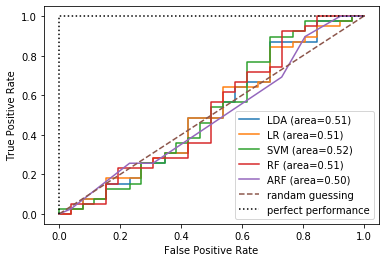

In [128]:
plt.plot(lda_fpr, lda_tpr, label='LDA (area=%0.2f)' %(lda_roc_auc))
plt.plot(lr_fpr, lr_tpr, label='LR (area=%0.2f)' %(lr_roc_auc))
plt.plot(svm_fpr, svm_tpr, label='SVM (area=%0.2f)' %(svm_roc_auc))
plt.plot(forest_fpr, forest_tpr, label='RF (area=%0.2f)' %(forest_roc_auc))
plt.plot(ada_fpr, ada_tpr, label='ARF (area=%0.2f)' %(ada_roc_auc))
plt.plot([0, 1], linestyle='--', label='randam guessing')
plt.plot([0, 0, 1], [0, 1, 1], color='black', linestyle=':', label='perfect performance')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'True Positive Rate')

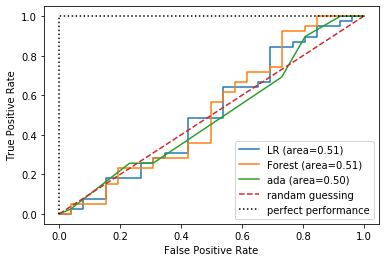

In [129]:
plt.plot(lr_fpr, lr_tpr, label='LR (area=%0.2f)' %(lr_roc_auc))
plt.plot(forest_fpr, forest_tpr, label='Forest (area=%0.2f)' %(forest_roc_auc))
plt.plot(ada_fpr, ada_tpr, label='ada (area=%0.2f)' %(ada_roc_auc))
plt.plot([0, 1], linestyle='--', label='randam guessing')
plt.plot([0, 0, 1], [0, 1, 1], color='black', linestyle=':', label='perfect performance')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# shap

In [39]:
shap.initjs()
shap_data=X_test_std
explainer = shap.TreeExplainer(model=forest, feature_perturbation='tree_path_dependent', model_output='margin')
shap_values = explainer.shap_values(X=X_test_std)

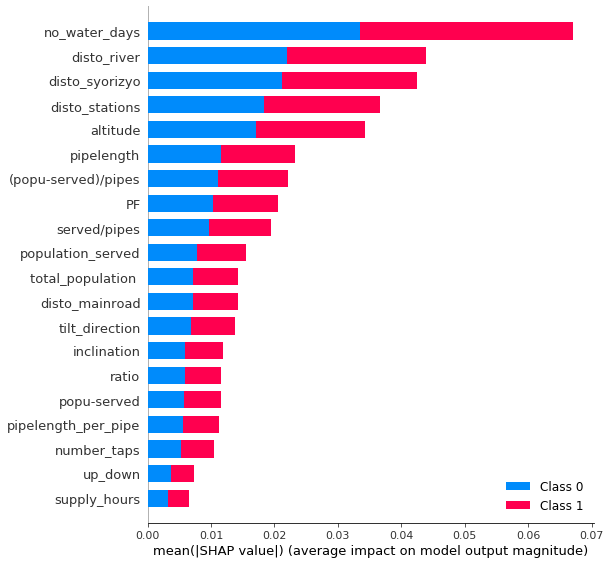

In [40]:
shap.summary_plot(shap_values, shap_data, plot_type="bar")

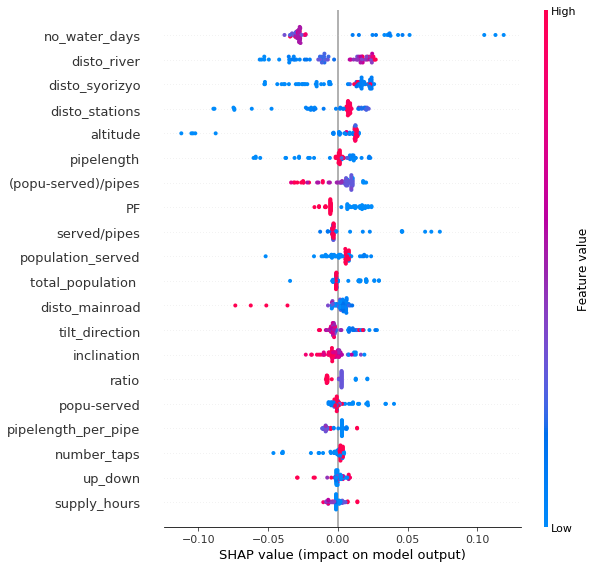

In [43]:
shap.summary_plot(shap_values[1], shap_data)

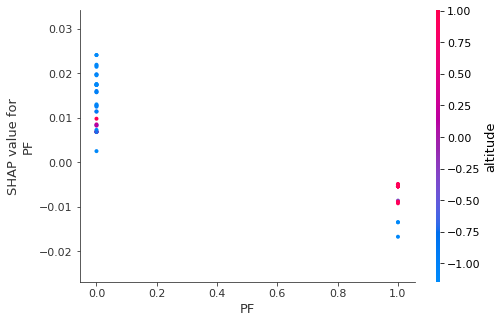

In [69]:
shap.dependence_plot('PF', shap_values[1], shap_data)

In [350]:
def check(array):
    row = [False] * array.shape[0]
    column = [False] * array.shape[1]

    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            if array[i, j] == 0:

                row[i] = True;
                column[j] = True;

    for i in range(len(row)):
        if row[i]:
            array[i, :] = 0

    for i in range(len(column)):
        if column[i]:
            array[:, i] = 0

    return array

In [362]:
a = np.random.randint(0, 10, size=(5, 5))

In [363]:
a

array([[3, 3, 0, 0, 2],
       [2, 2, 6, 6, 4],
       [5, 5, 0, 8, 0],
       [5, 3, 4, 6, 4],
       [1, 5, 9, 7, 2]])

In [364]:
check2(a)

array([[3, 3, 0, 0, 0],
       [2, 2, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [5, 3, 0, 0, 0],
       [1, 5, 0, 0, 0]])

In [360]:
def check2(array):

    rowHasZero = 0
    colHasZero = 0

    for i in range(array.shape[0]):
        if array[i, 0] == 0:
            rowHasZero = True
            break

    for j in range(array.shape[1]):
        if array[0, j] == 0:
            colHasZero = True
            break

    for i in range(1, array.shape[0]):
        for j in range(1, array.shape[1]):
            if array[i, j] == 0:
                array[i, 0] = 0
                array[0, j] = 0

    
    for i in range(array.shape[0]):
        if array[i, 0] == 0:
            array[i, :] = 0

    for j in range(array.shape[1]):
        if array[0, j] == 0:
            array[:, j] = 0    
        
        
    
    return array
